## Topic Modelling

In [1]:
import numpy as np
import pandas as pd

In [2]:
X = np.zeros((3012,8447))

with open('my_data/nyt_data.txt','r') as f:
    content = f.readlines()
    c = 0
for each_line in content:
    for each_entry in each_line.split(','):
        X[int(each_entry.split(":")[0])-1,c] = int(each_entry.split(":")[1])
    c = c + 1

In [ ]:
W = np.random.uniform(1,2,(3012,25))
H = np.random.uniform(1,2,(25,8447))

WH = np.matmul(W,H)
purple = np.divide(X,WH)
obj_list = []
for i in range(0,100):
    H = np.multiply(H, np.matmul(np.transpose(W)/(np.transpose(W).sum(axis=1)[:,np.newaxis] + 10**-16), purple))
    WH = np.matmul(W,H)
    purple = np.divide(X,WH + 10 ** -16)
    W = np.multiply(W, np.matmul(purple, np.transpose(H)/(np.sum(np.transpose(H),axis=0)+10**-16)))
    WH = np.matmul(W,H)
    purple = np.divide(X,WH + 10 ** -16)
    first = np.multiply(X,np.log(1/(WH+10**-16)))
    obj_list.append(np.sum(first+WH))

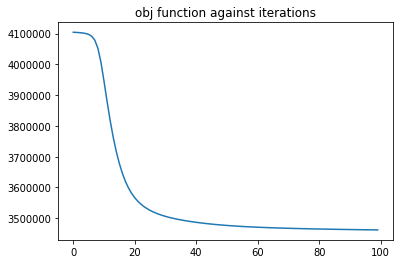

In [189]:
import matplotlib.pyplot as plt

plt.plot(range(0,100),obj_list)
plt.title("obj function against iterations")
plt.show()

In [147]:
W_norm = W / (np.sum(W,axis=0)+10**-16)
W_norm.shape

(3012, 25)

In [157]:
top_10 = np.argsort(W_norm,axis=0)[-10:,:]

In [181]:
top_weight = np.sort(W_norm, axis=0)[-10:,:]

(10, 25)

In [ ]:
vocab = pd.read_table('my_data/nyt_vocab.dat',header=None)

## The different word groups learned

In [188]:
for topic in range(0,25):
    df = vocab.iloc[top_10[:,topic],:].reset_index(drop=True)
    df = pd.concat([df,pd.DataFrame(top_weight[:,topic])],axis=1).reset_index(drop=True)
    df.columns = ['term', 'score']
    print(df)

       term     score
0  increase  0.010914
1     state  0.011893
2   percent  0.012153
3   program  0.012308
4    budget  0.013305
5       cut  0.013578
6       tax  0.014243
7      cost  0.019226
8     money  0.022855
9       pay  0.024270
         term     score
0        open  0.006698
1     gallery  0.006850
2      design  0.007355
3    painting  0.007821
4  photograph  0.008107
5  exhibition  0.009255
6  collection  0.010149
7      museum  0.010254
8      artist  0.012906
9         art  0.019003
      term     score
0     read  0.008057
1   author  0.008454
2  article  0.008661
3      man  0.008812
4    story  0.010157
5   writer  0.011423
6     life  0.015484
7   editor  0.018081
8    write  0.019354
9     book  0.020530
        term     score
0       sort  0.006134
1      quite  0.006591
2       kind  0.006814
3        big  0.007116
4        far  0.007595
5     little  0.007618
6      great  0.008123
7      thing  0.008259
8       idea  0.008924
9  different  0.009543
         t